In [1]:
try:
    import tools.invariants.functions as f
    from tools.invariants.kernel import Kernel
    from testing import *
except:
    import fastlane_bot.tools.invariants.functions as f
    from fastlane_bot.tools.invariants.kernel import Kernel
    from fastlane_bot.testing import *

import numpy as np
import math as m
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12,6]

print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(f.Function))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(Kernel))

imported m, np, pd, plt, os, sys, decimal; defined iseq, raises, require, Timer
Function v0.9.2 (20/Jan/2024)
Kernel v0.9 (18/Jan/2024)


# Functions (Invariants Module; NBTest066)

## Functions

### Built in functions
#### QuadraticFunction

In [2]:
qf = f.QuadraticFunction(a=1, b=0, c=-10)
assert qf.params() == {'a': 1, 'b': 0, 'c': -10}
assert qf.a == 1
assert qf.b == 0
assert qf.c == -10

In [3]:
qf2 = qf.update(c=-5)
assert raises(qf.update, k=1)
assert qf2.params() == {'a': 1, 'b': 0, 'c': -5}

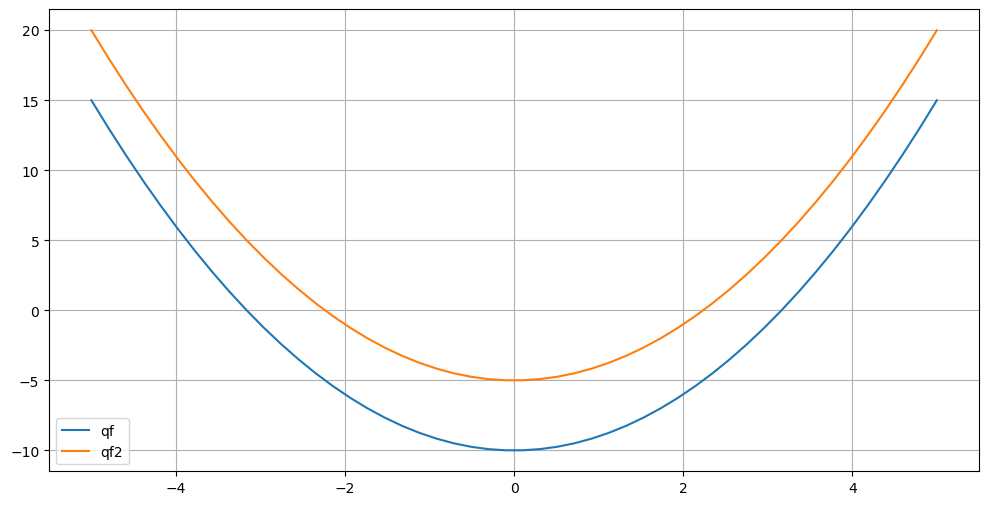

In [4]:
x_v = np.linspace(-5,5)
y1_v = [qf(xx) for xx in x_v]
y2_v = [qf2(xx) for xx in x_v]
plt.plot(x_v, y1_v, label="qf")
plt.plot(x_v, y2_v, label="qf2")
plt.legend()
plt.grid()

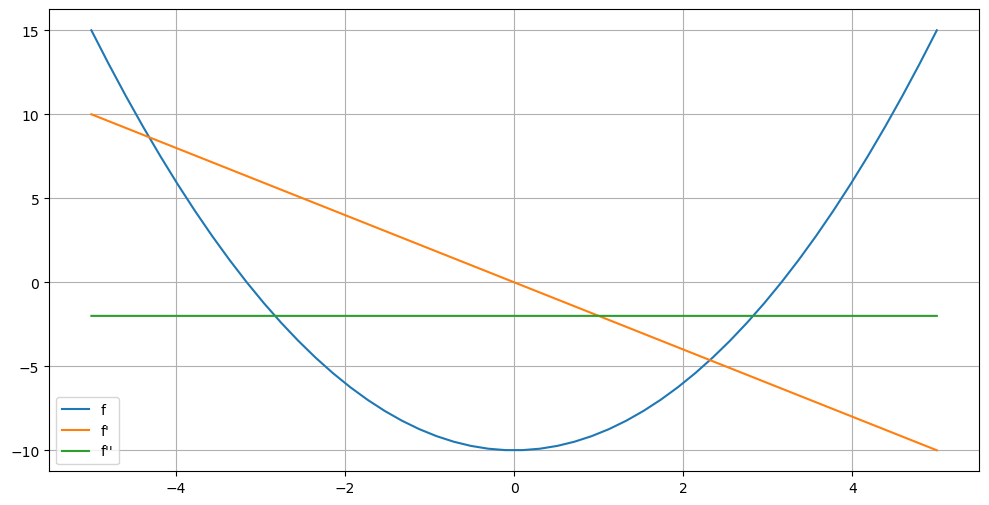

In [5]:
x_v = np.linspace(-5,5)
y1_v = [qf(xx) for xx in x_v]
y2_v = [qf.p(xx) for xx in x_v]
y3_v = [qf.pp(xx) for xx in x_v]
plt.plot(x_v, y1_v, label="f")
plt.plot(x_v, y2_v, label="f'")
plt.plot(x_v, y3_v, label="f''")
plt.legend()
plt.grid()

#### TrigFunction

In [6]:
qf = f.TrigFunction()
assert qf.params() == {'amp': 1, 'omega': 1, 'phase': 0}
assert qf.amp == 1
assert qf.omega == 1
assert qf.phase == 0
assert int(qf.PI) == 3

qf2 = qf.update(phase=1.5*qf.PI)
assert qf2.params() == {'amp': 1, 'omega': 1, 'phase': 1.5*qf.PI}

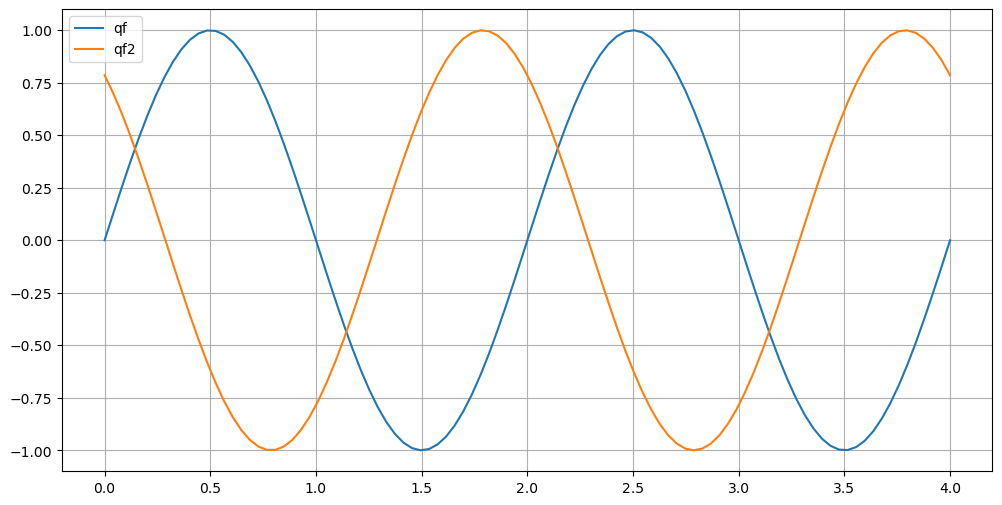

In [7]:
x_v = np.linspace(0, 4, 100)
y1_v = [qf(xx) for xx in x_v]
y2_v = [qf2(xx) for xx in x_v]
plt.plot(x_v, y1_v, label="qf")
plt.plot(x_v, y2_v, label="qf2")
plt.legend()
plt.grid()

#### HyperbolaFunction

In [8]:
qf = f.HyperbolaFunction()
assert qf.params() == {'k': 1, 'x0': 0, 'y0': 0}
assert qf.k == 1
assert qf.x0 == 0
assert qf.y0 == 0

qf2 = qf.update(y0=0.5)
# assert qf2.params() == {'amp': 1, 'omega': 1, 'phase': 1.5*qf.PI}

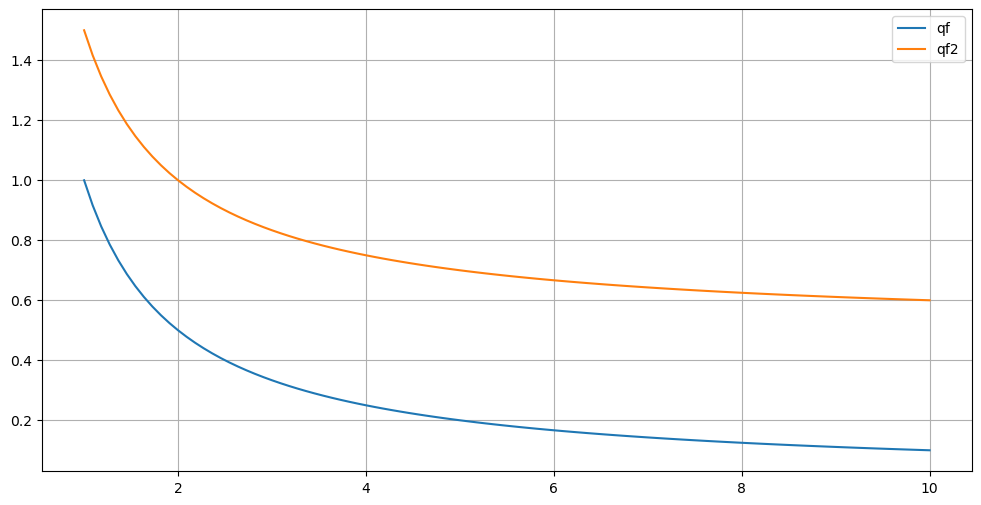

In [9]:
x_v = np.linspace(1, 10, 100)
y1_v = np.array([qf(xx) for xx in x_v])
y2_v = np.array([qf2(xx) for xx in x_v])
assert iseq(min(y2_v-y1_v), 0.5)
assert iseq(max(y2_v-y1_v), 0.5)
plt.plot(x_v, y1_v, label="qf")
plt.plot(x_v, y2_v, label="qf2")
plt.legend()
plt.grid()

### Derivatives

In [10]:
qf = f.QuadraticFunction(a=1, b=2, c=3)
qfp = qf.p_func()
qfpp = qf.pp_func()
assert qf.params() == {'a': 1, 'b': 2, 'c': 3}
assert qfp.func is qf
assert qfpp.func is qf

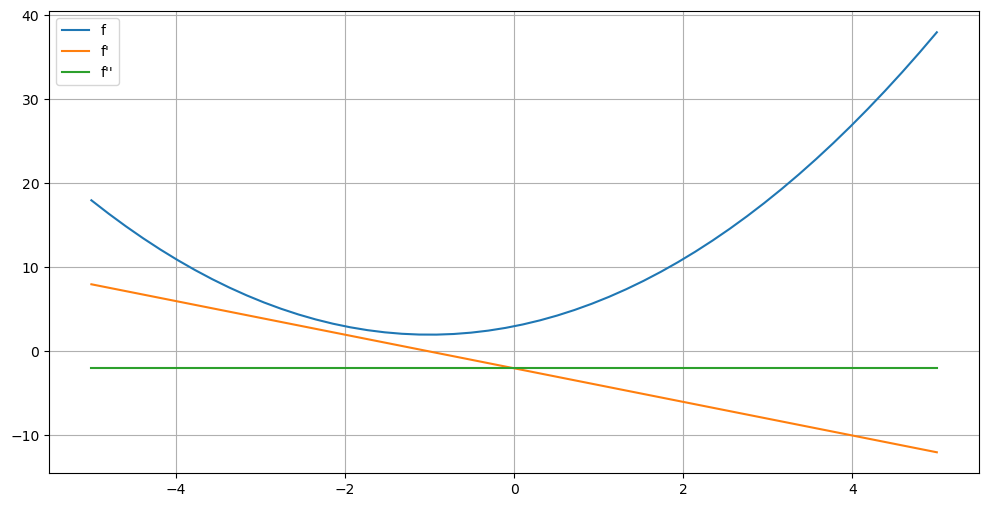

In [11]:
x_v = np.linspace(-5,5)
y1_v = [qf(xx) for xx in x_v]
y2_v = [qfp(xx) for xx in x_v]
y3_v = [qfpp(xx) for xx in x_v]
plt.plot(x_v, y1_v, label="f")
plt.plot(x_v, y2_v, label="f'")
plt.plot(x_v, y3_v, label="f''")
plt.legend()
plt.grid()

In [12]:
y2a_v = [qf.p(xx) for xx in x_v]   # calculate the derivative from the original object
y3a_v = [qf.pp(xx) for xx in x_v]  # ditto second derivative
y3b_v = [qfp.p(xx) for xx in x_v]  # calculate the second derivative as derivative from the derivative object
assert y2a_v == y2_v        # those are literally two ways of getting the same result
assert y3a_v == y3_v        # ditto
assert iseq(min(y3_v), -2)  # check that the second derivative is correct
assert iseq(max(y3_v), -2)  # ditto
assert iseq(min(y3b_v), 2)  # ditto, but the other way
assert iseq(max(y3b_v), 2)  # ditto
min(y3_v), max(y3_v), min(y3b_v), max(y3b_v)

(-2.0000018174926066,
 -1.9999998989657501,
 1.9999999488316007,
 2.000000751212651)

### Custom function

In [13]:
@f.dataclass(frozen=True)
class MyFunction(f.Function):
    k: float = 1
    
    def f(self, x):
        return (m.sqrt(1+x)-1)*self.k
mf = MyFunction()
mf2 = mf.update(k=2)
mf(1),mf.p(1),mf.pp(1)

(0.41421356237309515, -0.3535533907028654, 0.08838838549962702)

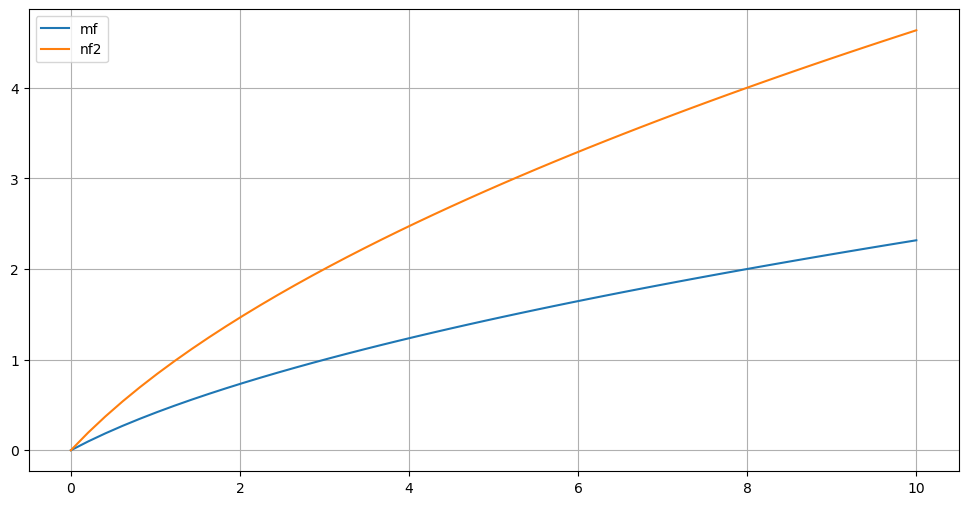

In [14]:
x_v = np.linspace(0,10)
y1_v = [mf(xx) for xx in x_v]
y2_v = [mf2(xx) for xx in x_v]
plt.plot(x_v, y1_v, label="mf")
plt.plot(x_v, y2_v, label="nf2")
plt.legend()
plt.grid()

## Kernel

### Integration function

In [15]:
integrate = Kernel.integrate_trapezoid
ONE = lambda x: 1
LIN = lambda x: 2*x
SQR = lambda x: 3*x*x

In [16]:
assert iseq(integrate(ONE, 0, 1, 2), 1)    # trapezoid integrates constant perfectly
assert iseq(integrate(ONE, 0, 1, 100), 1)
assert iseq(integrate(LIN, 0, 1, 2), 1)    # ditto linear
assert iseq(integrate(LIN, 0, 1, 100), 1)
assert iseq(integrate(SQR, 0, 1, 100), 1, eps=1e-3)
assert iseq(integrate(SQR, 0, 1, 1000), 1, eps=1e-6)

### Default kernel

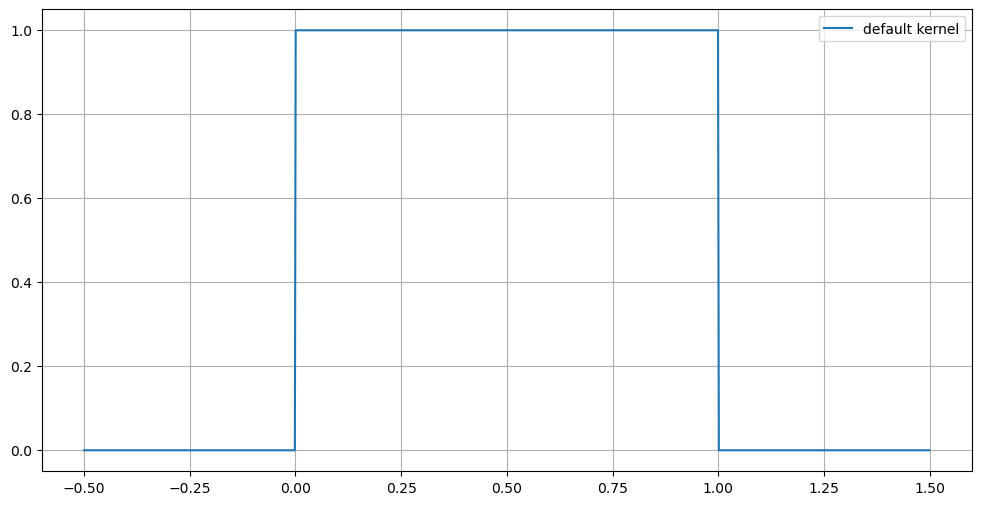

In [17]:
k = Kernel(steps=1000)
assert k.x_min == 0
assert k.x_max == 1
assert set(k.kernel(xx) for xx in np.linspace(k.x_min, k.x_max, 50)) == {1}
assert iseq(k.integrate(ONE), 1)
assert iseq(k.integrate(LIN), 1)
assert iseq(k.integrate(SQR), 1)
x_v = np.linspace(-0.5, 1.5, 1000)
plt.plot(x_v, [k.k(xx) for xx in x_v], label="default kernel")
plt.legend()
plt.grid()
plt.show()

### Flat kernels

In [18]:
k.integrate(ONE)

1.0

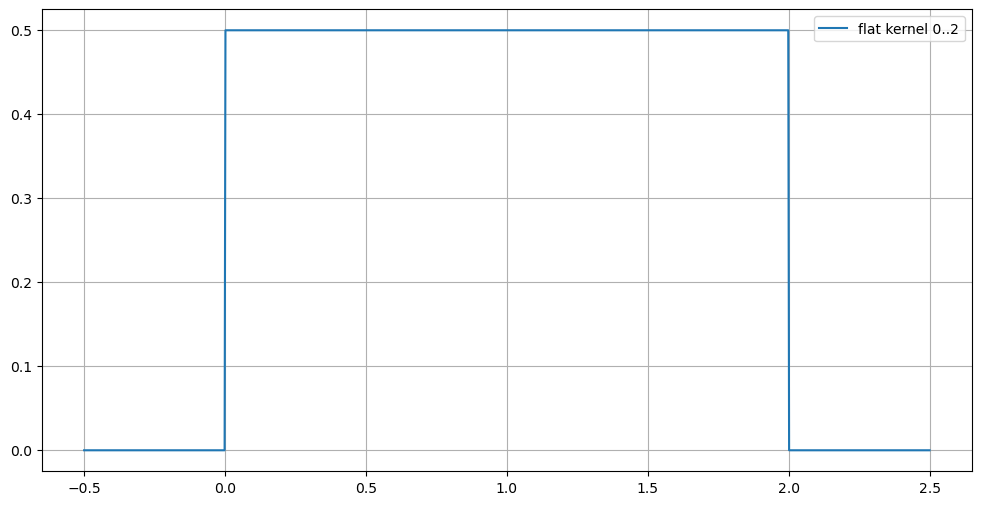

In [19]:
k = Kernel(x_max=2, kernel=lambda x: 0.5, steps=1000)
assert k.x_min == 0
assert k.x_max == 2
assert set(k.kernel(xx) for xx in np.linspace(k.x_min, k.x_max, 50)) == {0.5}
assert iseq(k.integrate(ONE), 1)
assert iseq(k.integrate(LIN), 2)
assert iseq(k.integrate(SQR), 4)
x_v = np.linspace(-0.5, 2.5, 1000)
plt.plot(x_v, [k.k(xx) for xx in x_v], label="flat kernel 0..2")
plt.legend()
plt.grid()
plt.show()

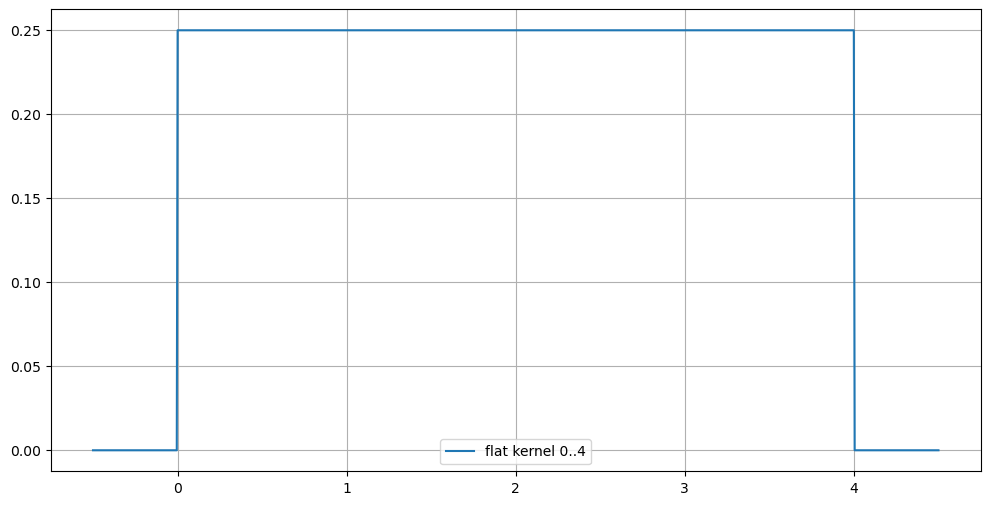

In [20]:
k = Kernel(x_max=4, kernel=lambda x: 0.25, steps=1000)
assert k.x_min == 0
assert k.x_max == 4
assert set(k.kernel(xx) for xx in np.linspace(k.x_min, k.x_max, 50)) == {0.25}
assert iseq(k.integrate(ONE), 1)
assert iseq(k.integrate(LIN), 4)
assert iseq(k.integrate(SQR), 16)
x_v = np.linspace(-0.5, 4.5, 1000)
plt.plot(x_v, [k.k(xx) for xx in x_v], label="flat kernel 0..4")
plt.legend()
plt.grid()
plt.show()

In [21]:
k.integrate(LIN), k.integrate(SQR)

(4.0, 16.000008000000012)

### Triangle and sawtooth kernels

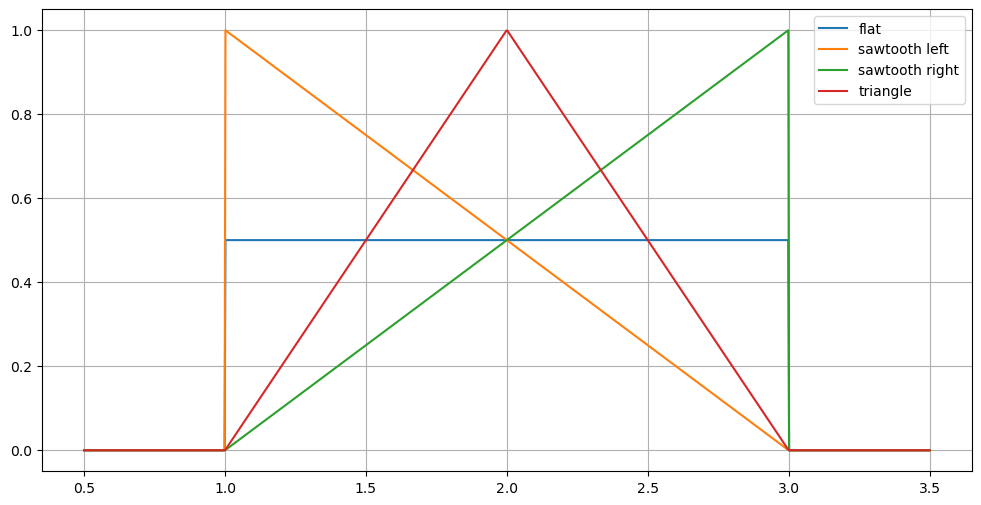

In [22]:
kf = Kernel(x_min=1, x_max=3, kernel=Kernel.FLAT, steps=1000)
kl = Kernel(x_min=1, x_max=3, kernel=Kernel.SAWTOOTHL, steps=1000)
kr = Kernel(x_min=1, x_max=3, kernel=Kernel.SAWTOOTHR, steps=1000)
kt = Kernel(x_min=1, x_max=3, kernel=Kernel.TRIANGLE, steps=1000)
x_v = np.linspace(0.5, 3.5, 1000)
plt.plot(x_v, [kf.k(xx) for xx in x_v], label="flat")
plt.plot(x_v, [kl.k(xx) for xx in x_v], label="sawtooth left")
plt.plot(x_v, [kr.k(xx) for xx in x_v], label="sawtooth right")
plt.plot(x_v, [kt.k(xx) for xx in x_v], label="triangle")
plt.legend()
plt.grid()
plt.show()

In [23]:
assert iseq(kf.integrate(ONE), 1)
assert iseq(kl.integrate(ONE), 1)
assert iseq(kr.integrate(ONE), 1)
assert iseq(kt.integrate(ONE), 1)

assert iseq(kf.integrate(LIN), 4)
assert iseq(kl.integrate(LIN), 10/3)
assert iseq(kr.integrate(LIN), 14/3)
assert iseq(kt.integrate(LIN), 4)

assert iseq(kf.integrate(SQR), 13)
assert iseq(kl.integrate(SQR), 9)
assert iseq(kr.integrate(SQR), 17)
assert iseq(kt.integrate(SQR), 12.5)

### Gaussian kernels

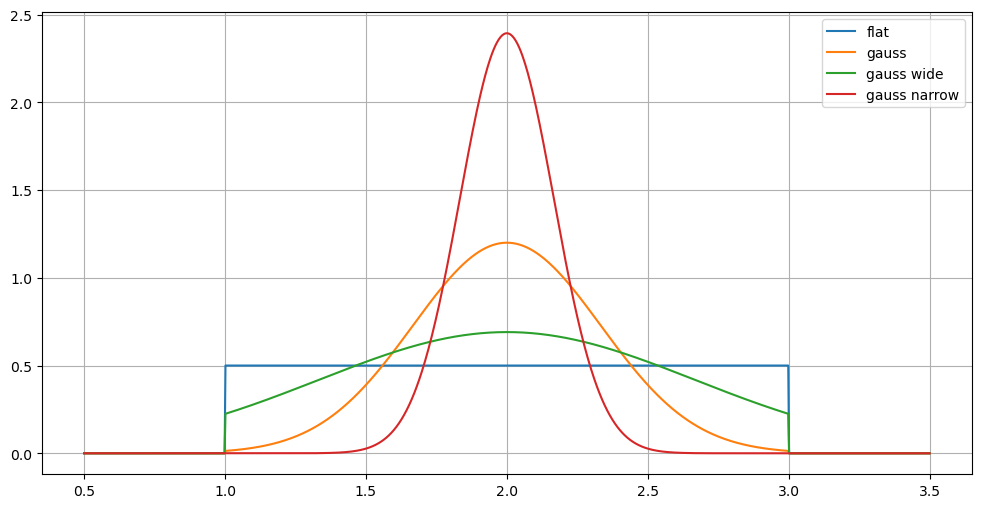

In [24]:
kf = Kernel(x_min=1, x_max=3, kernel=Kernel.FLAT, steps=1000)
kg = Kernel(x_min=1, x_max=3, kernel=Kernel.GAUSS, steps=1000)
kw = Kernel(x_min=1, x_max=3, kernel=Kernel.GAUSSW, steps=1000)
kn = Kernel(x_min=1, x_max=3, kernel=Kernel.GAUSSN, steps=1000)
x_v = np.linspace(0.5, 3.5, 1000)
plt.plot(x_v, [kf.k(xx) for xx in x_v], label="flat")
plt.plot(x_v, [kg.k(xx) for xx in x_v], label="gauss")
plt.plot(x_v, [kw.k(xx) for xx in x_v], label="gauss wide")
plt.plot(x_v, [kn.k(xx) for xx in x_v], label="gauss narrow")
plt.legend()
plt.grid()
plt.show()

In [25]:
assert iseq(kf.integrate(ONE), 1)
assert iseq(kg.integrate(ONE), 1, eps=1e-3)
assert iseq(kw.integrate(ONE), 1, eps=1e-3)
assert iseq(kn.integrate(ONE), 1, eps=1e-3)

## Function Vector

### vector operations and consistency

[FunctionVector::eq] called; funcs_eq=True, kernel_eq=True


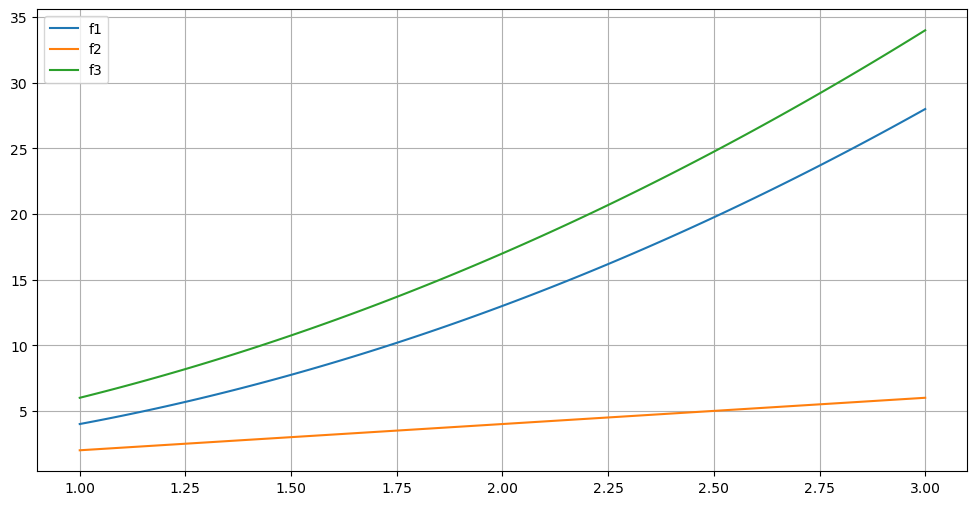

In [26]:
knl = Kernel(x_min=1, x_max=3, kernel=Kernel.FLAT, steps=1000)
f1 = f.QuadraticFunction(a=3, c=1)
f2 = f.QuadraticFunction(b=2)
f3 = f.QuadraticFunction(a=3, b=2, c=1)
f1v = f.FunctionVector({f1: 1}, kernel=knl)
f2v = f.FunctionVector({f2: 1}, kernel=knl)
fv = f.FunctionVector({f1: 1, f2: 1}, kernel=knl)
assert fv == f1v + f2v
x_v = np.linspace(1, 3, 100)
y1_v = [f1(xx) for xx in x_v]
y2_v = [f2(xx) for xx in x_v]
y3_v = [f3(xx) for xx in x_v]
yv_v = [fv(xx) for xx in x_v]
y_diff = np.array(yv_v) - np.array(y3_v)
plt.plot(x_v, y1_v, label="f1")
plt.plot(x_v, y2_v, label="f2")
plt.plot(x_v, y3_v, label="f3")
plt.legend()
plt.grid()

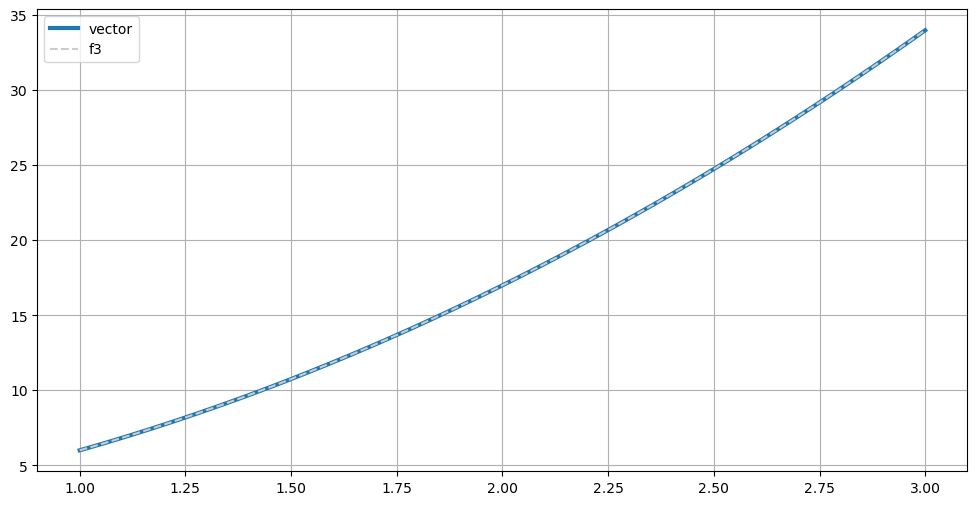

(8.881784197001252e-16, -1.7763568394002505e-15)

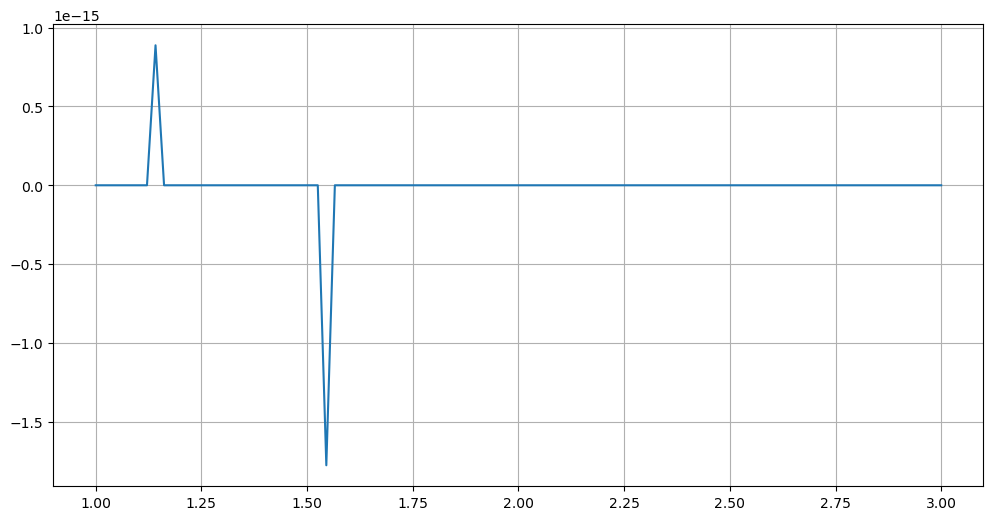

In [27]:
assert max(y_diff)<1e-10
assert min(y_diff)>-1e-10
plt.plot(x_v, yv_v, linewidth=3, label="vector")
plt.plot(x_v, y3_v, linestyle="--", color="#ccc", label="f3")
plt.legend()
plt.grid()
plt.show()
plt.plot(x_v, y_diff)
plt.grid()
max(y_diff), min(y_diff)

check that you can't add vectors with different kernel

In [28]:
f1v = f.FunctionVector({f1: 1}, kernel=knl)
f2v = f.FunctionVector({f2: 1}, kernel=knl)
assert not raises(lambda: f1v+f2v)
assert not raises(lambda: f1v-f2v)

f1v = f.FunctionVector({f1: 1}, kernel=knl)
f2v = f.FunctionVector({f2: 1}, kernel=None)
assert raises(lambda: f1v+f2v)
assert raises(lambda: f1v-f2v)

### convenience methods


In [29]:
fv = f.FunctionVector(
    {
        f.QuadraticFunction(a=1, b=2): 1,
        f.HyperbolaFunction(k=100, x0=2): 1,
        f.TrigFunction(phase=0.5): 1,
    }, 
    kernel=knl
)

#### params

In [30]:
assert isinstance(fv.params(as_dict=True), dict)
assert len(fv.params()) == len(fv)
fv.params(as_dict=True)

{QuadraticFunction(a=1, b=2, c=0): {'a': 1,
  'b': 2,
  'c': 0,
  '_classname': 'QuadraticFunction'},
 HyperbolaFunction(k=100, x0=2, y0=0): {'k': 100,
  'x0': 2,
  'y0': 0,
  '_classname': 'HyperbolaFunction'},
 TrigFunction(amp=1, omega=1, phase=0.5): {'amp': 1,
  'omega': 1,
  'phase': 0.5,
  '_classname': 'TrigFunction'}}

In [31]:
assert fv.params() == fv.params(as_dict=False)
assert not fv.params(as_dict=False) == fv.params(as_dict=True)
assert len(fv.params(as_dict=False)) == len(fv)
assert list(fv.params(as_dict=True).values()) == fv.params(as_dict=False)
assert fv.params(as_dict=False)[1] == {'k': 100, 'x0': 2, 'y0': 0, '_classname': 'HyperbolaFunction'}
assert fv.params(as_dict=False, classname=False)[2] == {'amp': 1, 'omega': 1, 'phase': 0.5}
fv.params(as_dict=False)

[{'a': 1, 'b': 2, 'c': 0, '_classname': 'QuadraticFunction'},
 {'k': 100, 'x0': 2, 'y0': 0, '_classname': 'HyperbolaFunction'},
 {'amp': 1, 'omega': 1, 'phase': 0.5, '_classname': 'TrigFunction'}]

In [32]:
assert fv.params(index=2) == fv.params(2)
assert isinstance(fv.params(index=2, as_dict=True), dict)
assert isinstance(fv.params(index=2, as_dict=False), dict)
assert fv.params(index=2, as_dict=False) != fv.params(index=2, as_dict=True)
assert fv.params(index=2) == {'amp': 1, 'omega': 1, 'phase': 0.5, '_classname': 'TrigFunction'}
assert fv.params(index=2, classname=False) == {'amp': 1, 'omega': 1, 'phase': 0.5}
fv.params(index=2)

{'amp': 1, 'omega': 1, 'phase': 0.5, '_classname': 'TrigFunction'}

#### update

In [33]:
assert raises(fv.update, [1,2,3]) == 'update with list of params not implemented yet'
assert raises(fv.update, [1,2,3], index=1) == 'index and key must be None if params is a list'
assert raises(fv.update, [1,2,3], 1) == 'index and key must be None if params is a list'
assert raises(fv.update, [1,2,3], key=1) == 'index and key must be None if params is a list'
assert raises(fv.update, dict()) == 'exactly one of index or key must be given'
assert raises(fv.update, dict(), index=1, key=1) == "can't give both index and key"
assert raises(fv.update, dict(), key=1) == "key not implemented yet"
params = fv.params()
fv.params()

[{'a': 1, 'b': 2, 'c': 0, '_classname': 'QuadraticFunction'},
 {'k': 100, 'x0': 2, 'y0': 0, '_classname': 'HyperbolaFunction'},
 {'amp': 1, 'omega': 1, 'phase': 0.5, '_classname': 'TrigFunction'}]

In [34]:
fv_1 = fv.update(dict(c=3), 0)
params1 = fv_1.params()
assert params[0] != params1[0] 
assert params[1:] == params1[1:]
assert params1[0] == {'a': 1, 'b': 2, 'c': 3, '_classname': 'QuadraticFunction'}
assert params1[0]["c"] == 3
assert params1[0]["a"] == params[0]["a"]
assert params1[0]["b"] == params[0]["b"]
assert params1[0]["_classname"] == params[0]["_classname"]
params1

[{'a': 1, 'b': 2, 'c': 3, '_classname': 'QuadraticFunction'},
 {'k': 100, 'x0': 2, 'y0': 0, '_classname': 'HyperbolaFunction'},
 {'amp': 1, 'omega': 1, 'phase': 0.5, '_classname': 'TrigFunction'}]

### integration and norms

#### high level

In [35]:
f1,f2

(QuadraticFunction(a=3, b=0, c=1), QuadraticFunction(a=0, b=2, c=0))

Kernel(x_min=1, x_max=3, kernel=<function Kernel.__post_init__.<locals>.<lambda> at 0x15ff39080>, kernel_name='builtin-flat', method='trapezoid', steps=1000)


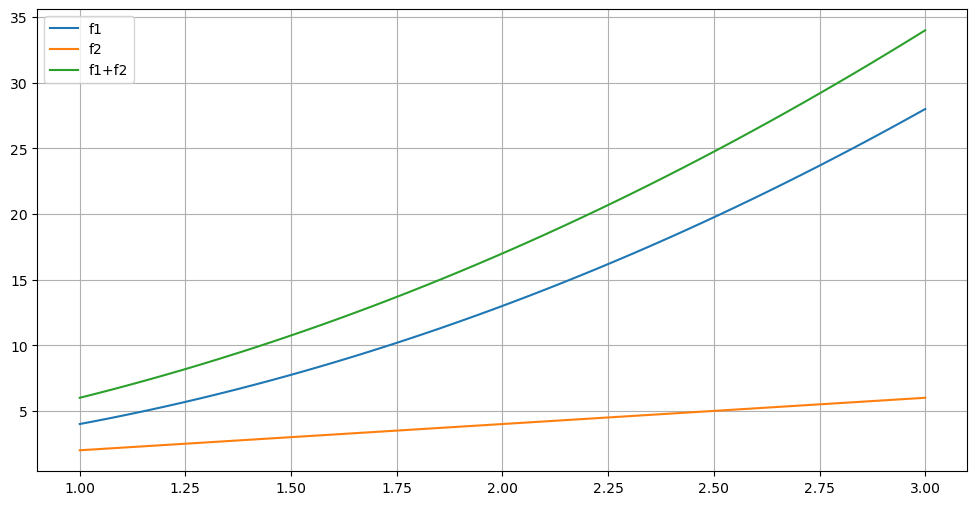

In [36]:
f1v = f.FunctionVector({f1: 1}, kernel=knl)
f2v = f1v.wrap(f2)
f1v.plot(show=False, label="f1")
f2v.plot(show=False, label="f2")
fv=f1v+f2v
fv.plot(show=False, label="f1+f2")
plt.legend()
print(f1v.kernel)
plt.show()
assert f1v.kernel == f2v.kernel
assert f1v.kernel == fv.kernel

In [37]:
assert iseq(f1v.integrate(), 13+1)
    # assert iseq(kf.integrate(ONE), 1)
    # assert iseq(kf.integrate(SQR), 13)

assert iseq(f2v.integrate(), 4)
    # assert iseq(kf.integrate(LIN), 4)

assert iseq(fv.integrate(), 18)

In [38]:
f2v.integrate()

4.000000000000001

#### quantification

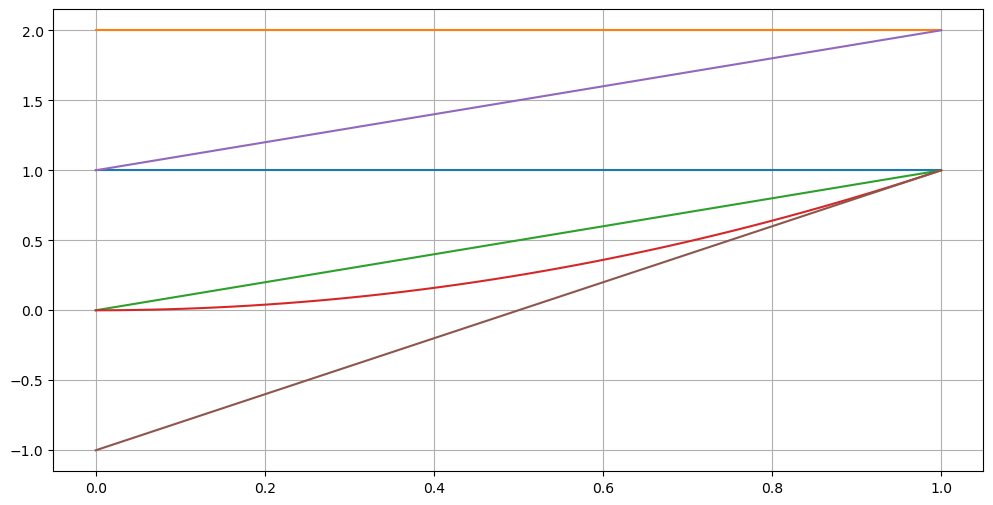

In [39]:
kernel = f.Kernel(x_min=0, x_max=1)
qf_v = f.QuadraticFunction(c=1).wrap(kernel)
qf2_v = f.QuadraticFunction(c=2).wrap(kernel)
qfl_v = f.QuadraticFunction(b=1).wrap(kernel)
qfq_v = f.QuadraticFunction(a=1).wrap(kernel)
qfl1_v = qfl_v + qf_v
qflm_v = 2*qfl_v - qf_v
qf_v.plot(show=False)
qf2_v.plot(show=False)
qfl_v.plot(show=False)
qfq_v.plot(show=False)
qfl1_v.plot(show=False)
qflm_v.plot(show=False)
#plt.ylim(-1,None)

In [40]:
# f(x) = 1 => Int = 1, Norm2 = 1
assert qf_v.integrate() == 1
assert qf_v.norm2() == 1
assert qf_v.norm1() == 1
assert qf_v.norm() == 1

# f(x) = 2 => Int = 2, Norm2 = 4
assert qf2_v.integrate() == 2
assert qf2_v.norm2() == 4
assert qf2_v.norm1() == 2
assert qf2_v.norm() == 2

# f(x) = x => Int = 1/2, Norm2 = 1/3
assert qfl_v.integrate() == 1/2
assert iseq(qfl_v.norm2(), qfq_v.integrate())
assert iseq(qfl_v.norm2(), 1/3, eps=1e-3)
assert iseq(qfl_v.norm1(), 1/2, eps=1e-3)
assert iseq(qfl_v.norm(), m.sqrt(qfl_v.norm2()))

# f(x) = x^2 => Int = 1/3, Norm2 = 1/5
assert iseq(qfq_v.integrate(), 1/3, eps=1e-3)
assert iseq(qfq_v.norm2(), 1/5, eps=1e-3)
assert iseq(qfq_v.norm1(), 1/3, eps=1e-3)
assert iseq(qfq_v.norm(), m.sqrt(qfq_v.norm2()))

# f(x) = 1 + x ==> Int = 1.5, Norm2 = 2 1/3
assert iseq(qfl1_v.integrate(), 1.5)
assert iseq(qfl1_v.integrate(), qfl_v.integrate() + qf_v.integrate())
assert iseq(qfl1_v.norm2(), 2+1/3, eps=1e-3)
    # (1+x)^2 = x^2 + 2x + 1 => 1/3 x^3 + x^2 + x = 2 1/3 
assert iseq(qfl1_v.norm1(), 1.5, eps=1e-3)
assert iseq(qfl1_v.norm(), m.sqrt(qfl1_v.norm2()))

# f(x) = 1 - 2x => Int = 0, Norm1 = 1/2, Norm2 = 1/3
assert iseq(0, qflm_v.integrate(), eps=1e-3)
assert iseq(qflm_v.norm2(), 1/3, eps=1e-3)
    # x - 2/3 x^3 = 1/3
assert iseq(qflm_v.norm1(), 1/2, eps=1e-3)
assert iseq(qflm_v.norm(), m.sqrt(qflm_v.norm2()))

### goal seek and minimize

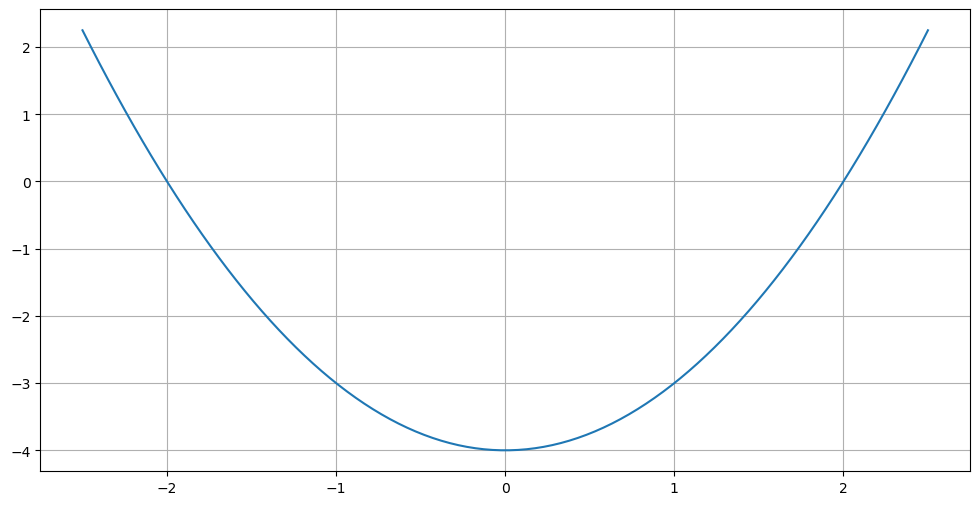

In [41]:
f1 = f.QuadraticFunction(a=1, c=-4)
f1v = f.FunctionVector().wrap(f1)
x_v = np.linspace(-2.5, 2.5, 100)
y1_v = [f1(xx) for xx in x_v]
plt.plot(x_v, y1_v, label="f")
#plt.legend()
plt.grid()

In [42]:
assert iseq(f1v.goalseek(target=0, x0=1), 2)
assert iseq(f1v.goalseek(target=0, x0=-1), -2)
assert iseq(f1v.goalseek(target=-3, x0=1), 1)
assert iseq(f1v.goalseek(target=-3, x0=-1), -1)
assert iseq(0, f1v.minimize1(x0=5), eps=1e-3)
f1v.minimize1(x0=5)

0.00030468016160726646

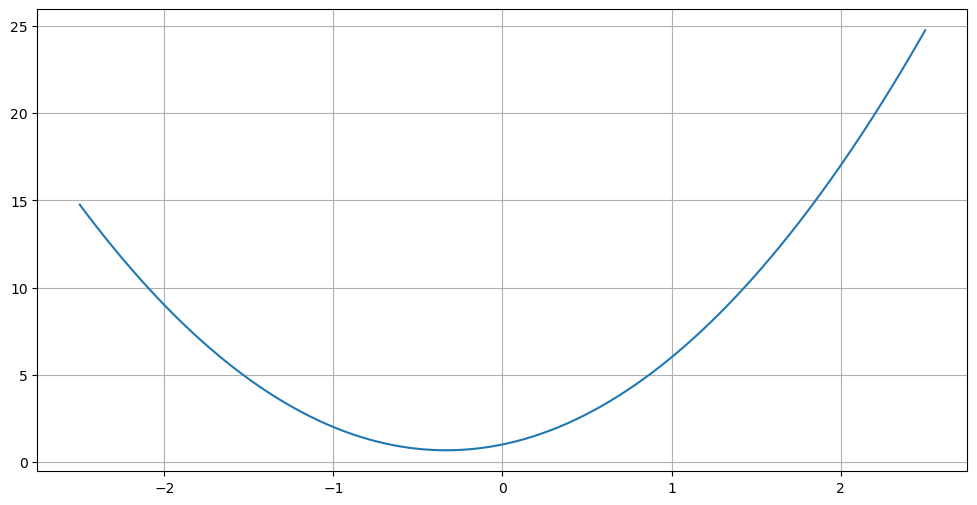

In [43]:
f2 = f.QuadraticFunction(a=3, b=2, c=1)
f2v = f.FunctionVector({f2: 1})
x_v = np.linspace(-2.5, 2.5, 100)
y2_v = [f2(xx) for xx in x_v]
plt.plot(x_v, y2_v, label="f")
#plt.legend()
plt.grid()

In [44]:
assert iseq(f2v.goalseek(target=5), 0.8685170919424989, eps=1e-4)
assert iseq(f2v.minimize1(), -0.3332480000000852, eps=1e-4)
f2v.goalseek(target=5), f2v.minimize1()

(0.8685170919424989, -0.3332480000000852)

## Restricted and apply kernel

restricted functions (`f_r`, more generally `restricted(func)`) are zero outside the kernel domain; kernel-applied functions (`f_k`, more generally `apply_kernel(func)`) is multiplied with the kernel

In [45]:
func = f.TrigFunction()

### Flat kernel

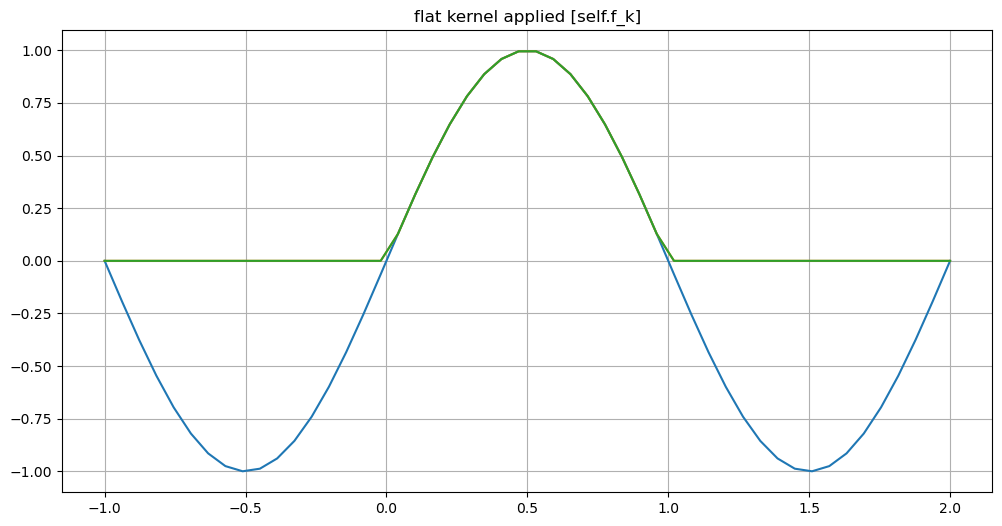

In [46]:
kernel = Kernel(0, 1, Kernel.FLAT)
fv = f.FunctionVector({func: 1}, kernel=kernel)
f_r = fv.restricted(fv.f)
f_k = fv.apply_kernel(fv.f) 

assert not fv.f(-0.5) == 0
assert not fv.f(1.5) == 0
assert f_r(-0.5) == fv.f_r(-0.5) == 0
assert f_r(1.5) == fv.f_r(1.5) == 0
assert f_r(0.5) == fv.f_r(0.5) == fv.f(0.5)
assert f_r(0.25) == fv.f_r(0.25) == fv.f(0.25)
assert f_r(0.75) == fv.f_r(0.75) == fv.f(0.75)

assert f_k(-0.5) == fv.f_k(-0.5) == 0
assert f_k(1.5) == fv.f_k(1.5) == 0
assert f_k(0.5) == fv.f_k(0.5) == fv.f(0.5)   * kernel(0.5)
assert f_k(0.25) == fv.f_k(0.25) == fv.f(0.25) * kernel(0.25)
assert f_k(0.75) == fv.f_k(0.75) == fv.f(0.75) * kernel(0.75)

fv.plot(fv.f, x_min=-1, x_max=2, title="full function [self.f]")
fv.plot(fv.f_r, x_min=-1, x_max=2, title="restricted function [self.f_r]")
fv.plot(fv.f_k, x_min=-1, x_max=2, title="flat kernel applied [self.f_k]")

### Sawtooth-Left kernel

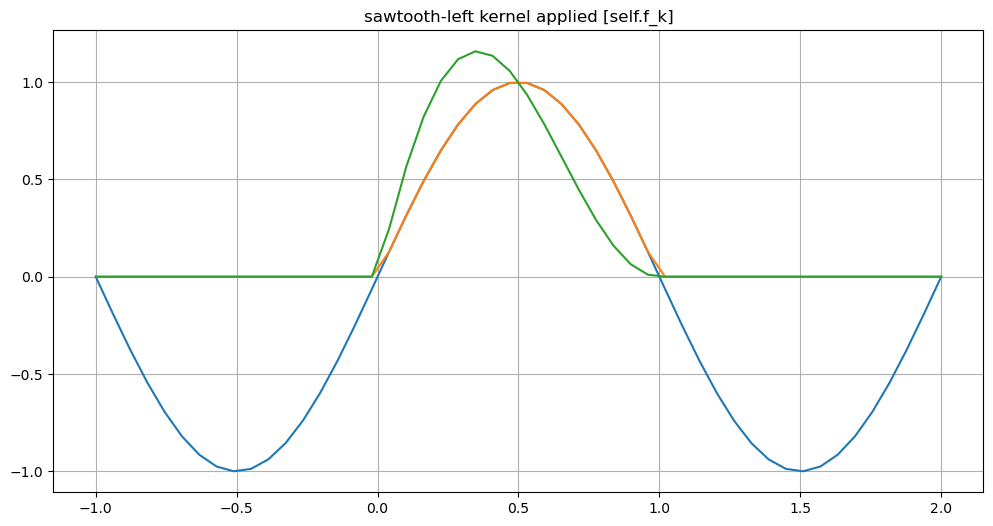

In [47]:
kernel = Kernel(0, 1, Kernel.SAWTOOTHL)
fv = f.FunctionVector({func: 1}, kernel=kernel)
f_r = fv.restricted(fv.f)
f_k = fv.apply_kernel(fv.f) 

assert not fv.f(-0.5) == 0
assert not fv.f(1.5) == 0
assert f_r(-0.5) == fv.f_r(-0.5) == 0
assert f_r(1.5) == fv.f_r(1.5) == 0
assert f_r(0.5) == fv.f_r(0.5) == fv.f(0.5)
assert f_r(0.25) == fv.f_r(0.25) == fv.f(0.25)
assert f_r(0.75) == fv.f_r(0.75) == fv.f(0.75)

assert f_k(-0.5) == fv.f_k(-0.5) == 0
assert f_k(1.5) == fv.f_k(1.5) == 0
assert f_k(0.5) == fv.f_k(0.5) == fv.f(0.5)   * kernel(0.5)
assert f_k(0.25) == fv.f_k(0.25) == fv.f(0.25) * kernel(0.25)
assert f_k(0.75) == fv.f_k(0.75) == fv.f(0.75) * kernel(0.75)

fv.plot(fv.f, x_min=-1, x_max=2, title="full function [self.f]")
fv.plot(fv.f_r, x_min=-1, x_max=2, title="restricted function [self.f_r]")
fv.plot(fv.f_k, x_min=-1, x_max=2, title="sawtooth-left kernel applied [self.f_k]")

## Curve fitting

### norm and curve distance

We have various ways of measuring the distance between a FunctionVector (that includes a kernel) and a Function, all being based on the L2 norm with kernel applied

- Use `FunctionVector.distance2` for the squared distance between the FunctionVector and the Function, or `distance` for the squareroot thereof*

- Wrap the Function in a FunctionVector with the same kernel using the `wrap` method, substract the two FunctionVectors from each other, and use `norm2` or `norm`

*in optimization you typically want to use the squared function because it behaves better and you don't have to calculate the square root

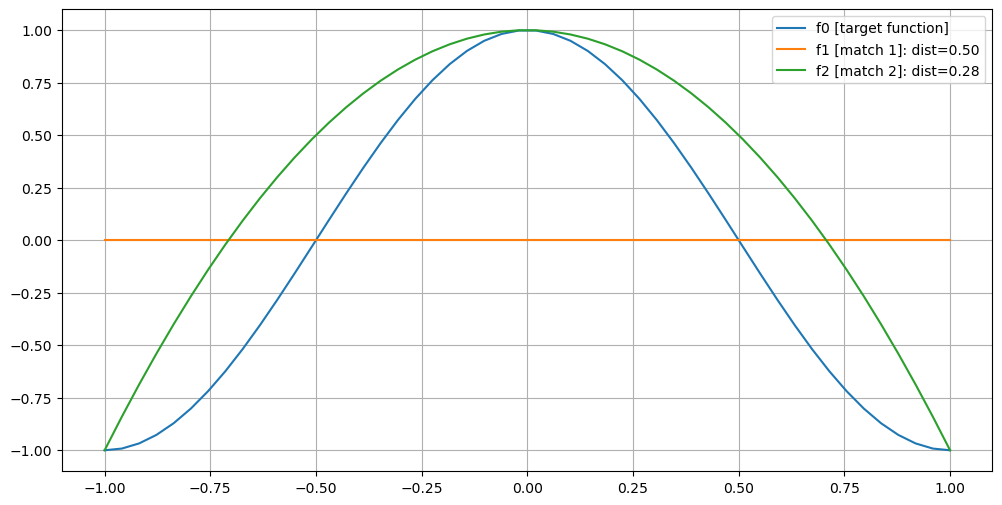

In [48]:
# create the template function vector
fv_t = f.FunctionVector(kernel=Kernel(x_min=-1, x_max=1, kernel=Kernel.FLAT))
assert fv_t.f(0) == 0

# create target and match functions and wrap them in FunctionVector
f0 = f.TrigFunction(phase=1/2)
f0v = fv_t.wrap(f0)
f1v = fv_t.wrap(f.QuadraticFunction(c=0))
f2v = fv_t.wrap(f.QuadraticFunction(a=-2, c=1))

# check norms and distances
diff1 = (f0v-f1v).norm()
diff2 = (f0v-f2v).norm()
assert iseq( (f0v-f1v).norm2(), (f0v-f1v).norm()**2)
assert iseq( (f0v-f2v).norm2(), (f0v-f2v).norm()**2)
assert iseq(f1v.dist2_L2(f0), (f0v-f1v).norm2())
assert iseq(f2v.dist2_L2(f0), (f0v-f2v).norm2())
assert iseq(f1v.dist_L2(f0), (f0v-f1v).norm())
assert iseq(f2v.dist_L2(f0), (f0v-f2v).norm())
assert iseq(f1v.dist_L1(f0), (f0v-f1v).norm1())
assert iseq(f2v.dist_L1(f0), (f0v-f2v).norm1())

# plot
f0v.plot(show=False, label="f0 [target function]")
f1v.plot(show=False, label=f"f1 [match 1]: dist={diff1:.2f}")
f2v.plot(show=False, label=f"f2 [match 2]: dist={diff2:.2f}")
plt.legend()
plt.show()

### curve fitting

#### flat kernel

In [49]:
fv_template = f.FunctionVector(kernel=Kernel(x_min=-1, x_max=1, kernel=Kernel.FLAT))
target_f = f.TrigFunction(phase=1/2)
target_fv = fv_template.wrap(target_f)
f_match0 = f.QuadraticFunction()
params0 = dict(a=0, b=0, c=0)
params = target_fv.curve_fit(f_match0, params0)
f_match = f_match0.update(**params)
params, f_match

({'a': -2.266725245480411,
  'b': -4.999979597020143e-07,
  'c': 0.7553958307274233},
 QuadraticFunction(a=-2.266725245480411, b=-4.999979597020143e-07, c=0.7553958307274233))

FunctionVector(vec={QuadraticFunction(a=-2.266725245480411, b=-4.999979597020143e-07, c=0.7553958307274233): 1}, kernel=Kernel(x_min=-1, x_max=1, kernel=<function Kernel.__post_init__.<locals>.<lambda> at 0x1602f1260>, kernel_name='builtin-flat', method='trapezoid', steps=100))

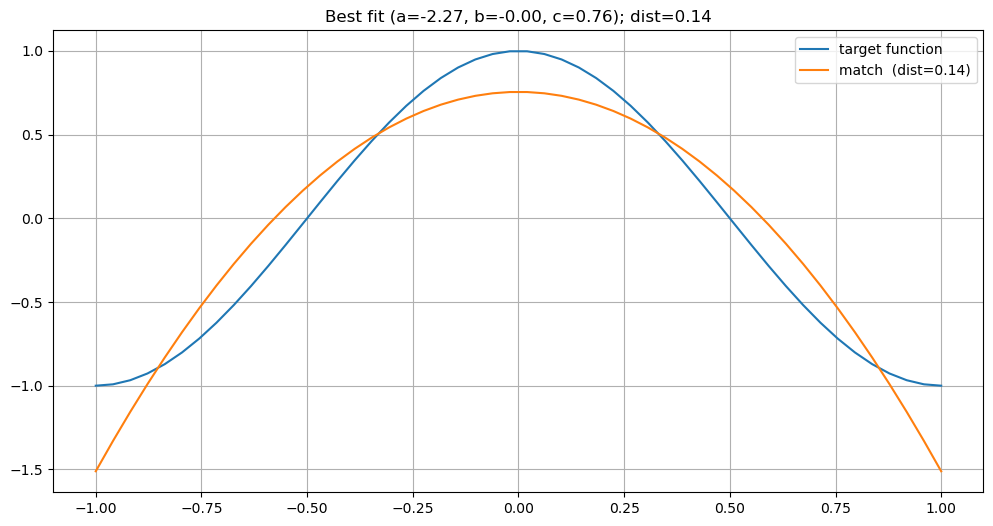

In [50]:
f_match_v = target_fv.wrap(f_match)
diff = (target_fv-f_match_v).norm()
target_fv.plot(show=False, label="target function")
f_match_v.plot(show=False, label=f"match  (dist={diff:.2f})")
plt.title(f"Best fit (a={params['a']:.2f}, b={params['b']:.2f}, c={params['c']:.2f}); dist={diff:.2f}")
plt.legend()
f_match_v

#### skewed kernel (sawtooth-left)

In [51]:
fv_template = f.FunctionVector(kernel=Kernel(x_min=-1, x_max=1, kernel=Kernel.SAWTOOTHL))
target_f = f.TrigFunction(phase=1/2)
target_fv = fv_template.wrap(target_f)
f_match0 = f.QuadraticFunction()
params0 = dict(a=0, b=0, c=0)
params = target_fv.curve_fit(f_match0, params0)
f_match = f_match0.update(**params)
target_fv.kernel, params, f_match

(Kernel(x_min=-1, x_max=1, kernel=<function Kernel.__post_init__.<locals>.<lambda> at 0x160392ac0>, kernel_name='builtin-sawtoothl', method='trapezoid', steps=100),
 {'a': -1.8836343582517845, 'b': 0.2661645670906654, 'c': 0.7347668924372053},
 QuadraticFunction(a=-1.8836343582517845, b=0.2661645670906654, c=0.7347668924372053))

FunctionVector(vec={QuadraticFunction(a=-1.8836343582517845, b=0.2661645670906654, c=0.7347668924372053): 1}, kernel=Kernel(x_min=-1, x_max=1, kernel=<function Kernel.__post_init__.<locals>.<lambda> at 0x160392ac0>, kernel_name='builtin-sawtoothl', method='trapezoid', steps=100))

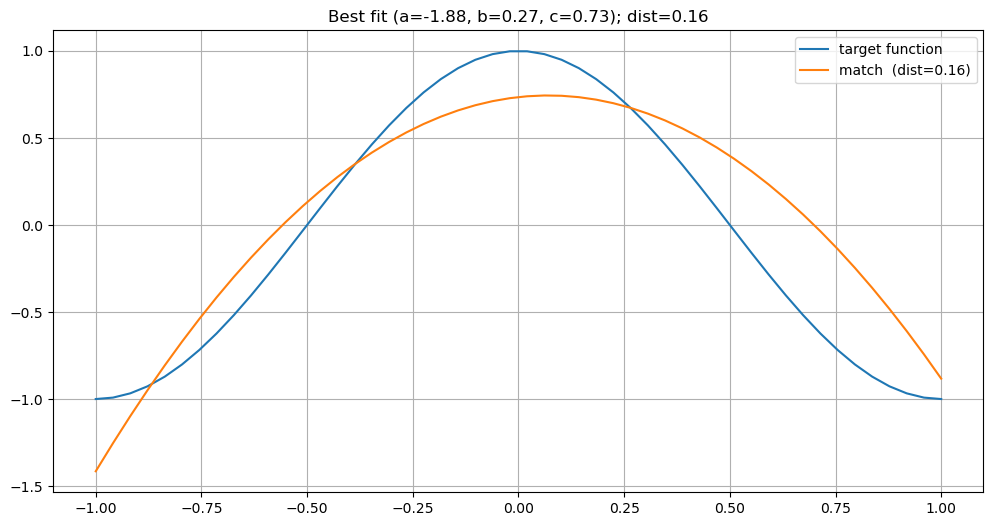

In [52]:
f_match_v = target_fv.wrap(f_match)
diff = (target_fv-f_match_v).norm()
target_fv.plot(show=False, label="target function")
f_match_v.plot(show=False, label=f"match  (dist={diff:.2f})")
plt.title(f"Best fit (a={params['a']:.2f}, b={params['b']:.2f}, c={params['c']:.2f}); dist={diff:.2f}")
plt.legend()
f_match_v

## High dimensional minimization

### Example

here we use as example the function

$$
f(x,y) = (x-2)^2 + (y-2)^2
$$

which obviously should be minimal at $(x,y) = (2,2)$

In [53]:
func = lambda x,y: (x-2)**2 + (y-2)**2

In [54]:
r, dxdy = f.minimize(func, x0=[20, -5], learning_rate=None, return_path=True)
assert iseq(r[-1][0], 2, eps=1e-3)
assert iseq(r[-1][1], 2, eps=1e-3)
r[-1], dxdy

((2.0002364190731674, 1.9999073648139465), array([ 0.00078973, -0.00030712]))

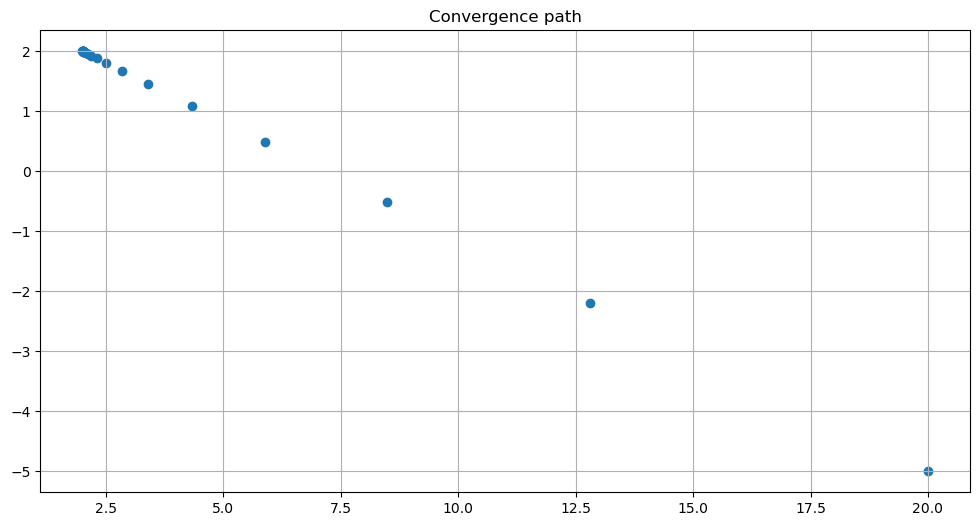

In [55]:
x,y = zip(*r)
plt.scatter(x,y)
plt.title("Convergence path")
plt.grid()

In [56]:
r, dxdy = f.minimize(func, x0=dict(x=20, y=-5), learning_rate=None, return_path=True)
assert iseq(r[-1]["x"], 2, eps=1e-3)
assert iseq(r[-1]["y"], 2, eps=1e-3)
r[-1], dxdy

({'x': 2.0002364190731674, 'y': 1.9999073648139465},
 {'x': 0.0007897302440762718, 'y': -0.0003071172868030315})

### Testing e_i, e_k and bump

In [57]:
e_i = f.FunctionVector.e_i
e_k = f.FunctionVector.e_k
bump = f.FunctionVector.bump

In [58]:
assert np.array_equal(e_i(1,5), np.array([0., 1., 0., 0., 0.]))
assert e_k("b", dict(a=1, b=2, c=3)) == {'a': 0, 'b': 1, 'c': 0}
assert bump(dict(a=1, b=2, c=3), "b", 0.25) == {'a': 1, 'b': 2.25, 'c': 3}

## Sundry tests

In [59]:
fmt = f.core.fmt
dct = {"a": 1.234578, "b": 2.3456789}
lst = list(dct.values())
assert fmt(dct) == {'a': 1.2346, 'b': 2.3457}
assert fmt(lst) == [1.2346, 2.3457]
assert fmt(dct, ".2f") == {'a': 1.23, 'b': 2.35}
assert fmt(lst, ".2f") == [1.23, 2.35]
assert fmt(lst, ".2f", as_float=False) == ['1.23', '2.35']
fmt(lst, ".2f")

[1.23, 2.35]

## Function examples [NOTEST]

### QuadraticFunction

{'a': 1, 'b': 2, 'c': 3}
fn1 = fn2 @ (-1.00, 2.00)


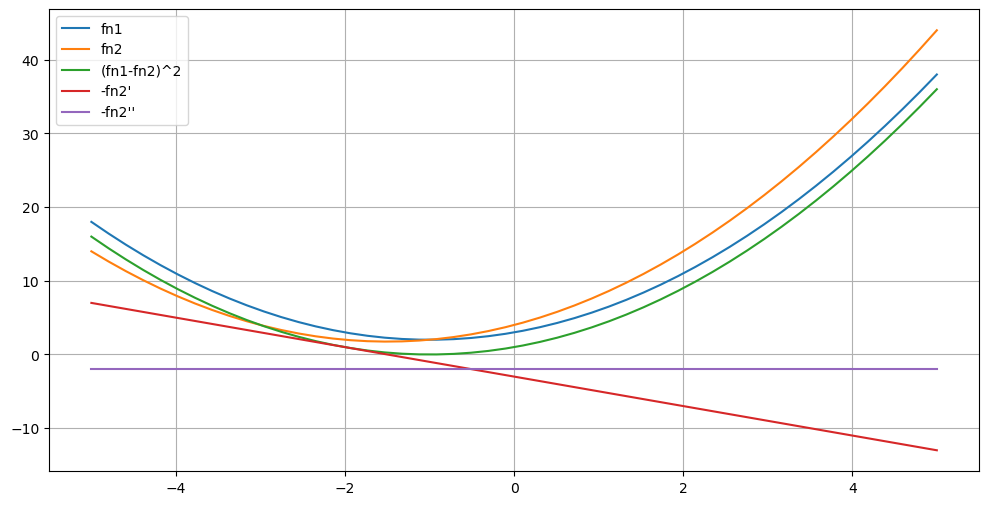

In [60]:
fn1 = f.Quadratic(a=1, b=2, c=3)
print(fn1.params())
fn2 = fn1.update(b=3, c=4)
diff2 = lambda x: (fn1(x)-fn2(x))**2
fn1.plot(-5,5, label="fn1")
fn2.plot(-5,5, label="fn2")
fn2.plot(-5,5, func=diff2, label="(fn1-fn2)^2")
fn2.plot(-5,5, func=fn2.p, label="-fn2'")
fn2.plot(-5,5, func=fn2.pp, label="-fn2''")
plt.legend()
x0 = f.goalseek(func=diff2)
print(f"fn1 = fn2 @ ({x0:.2f}, {fn1(x0):.2f})")
plt.show()

### PowerlawFunction

{'N': 1, 'alpha': -1, 'x0': 0}
fn1 = fn3 @ (2.18, 0.46)


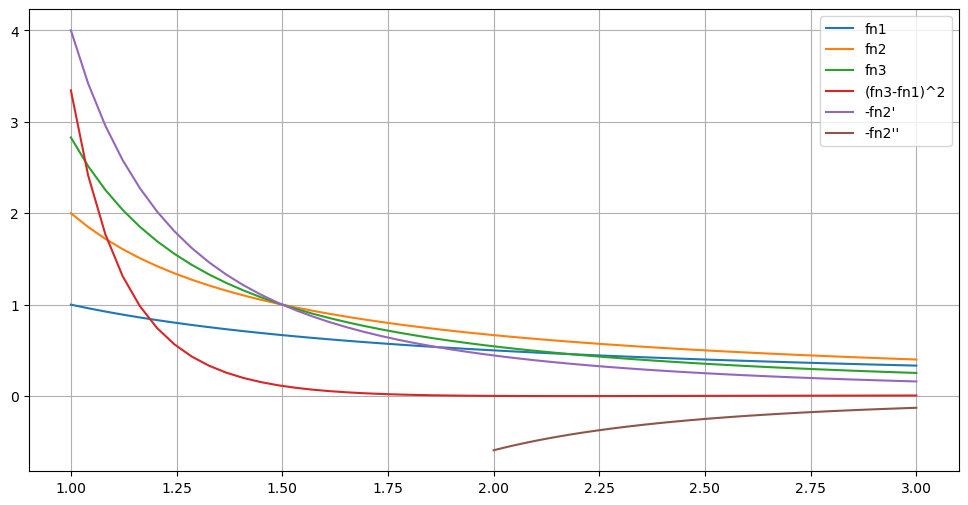

In [61]:
fn1 = f.Powerlaw()
print(fn1.params())
fn2 = fn1.update(x0=0.5)
fn3 = fn2.update(alpha=-1.5)
diff2 = lambda x: (fn3(x)-fn1(x))**2
fn1.plot(1,3, label="fn1")
fn2.plot(1,3, label="fn2")
fn3.plot(1,3, label="fn3")
fn2.plot(1,3, func=diff2, label="(fn3-fn1)^2")
fn2.plot(1,3, func=fn2.p, label="-fn2'")
fn2.plot(2,3, func=fn2.pp, label="-fn2''")
plt.legend()
x0 = f.goalseek(func=diff2)
print(f"fn1 = fn3 @ ({x0:.2f}, {fn1(x0):.2f})")
plt.show()

### TrigFunction

{'amp': 1, 'omega': 1, 'phase': 0}
fn1 = fn3 @ (1.41, -0.96)


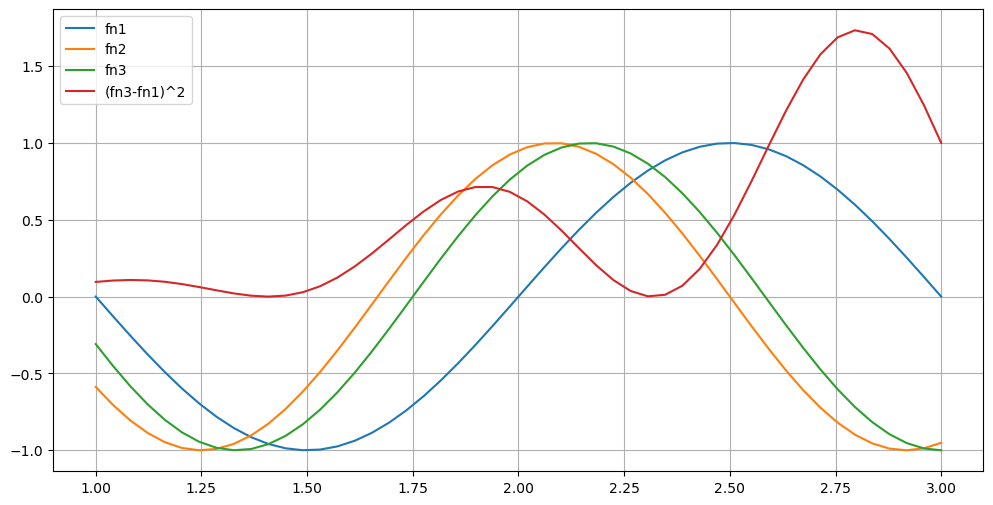

In [62]:
fn1 = f.Trig()
print(fn1.params())
fn2 = fn1.update(omega=1.2)
fn3 = fn2.update(phase=-0.1)
diff2 = lambda x: (fn3(x)-fn1(x))**2
fn1.plot(1,3, label="fn1")
fn2.plot(1,3, label="fn2")
fn3.plot(1,3, label="fn3")
fn2.plot(1,3, func=diff2, label="(fn3-fn1)^2")
#fn2.plot(1,3, func=fn2.p, label="-fn2'")
#fn2.plot(1,3, func=fn2.pp, label="-fn2''")
plt.legend()
x0 = f.goalseek(func=diff2, x0=1.5)
print(f"fn1 = fn3 @ ({x0:.2f}, {fn1(x0):.2f})")
plt.show()

### ExpFunction

{'N': 1, 'k': 1, 'x0': 0}
fn1 = fn3 @ (0.60, 1.83)


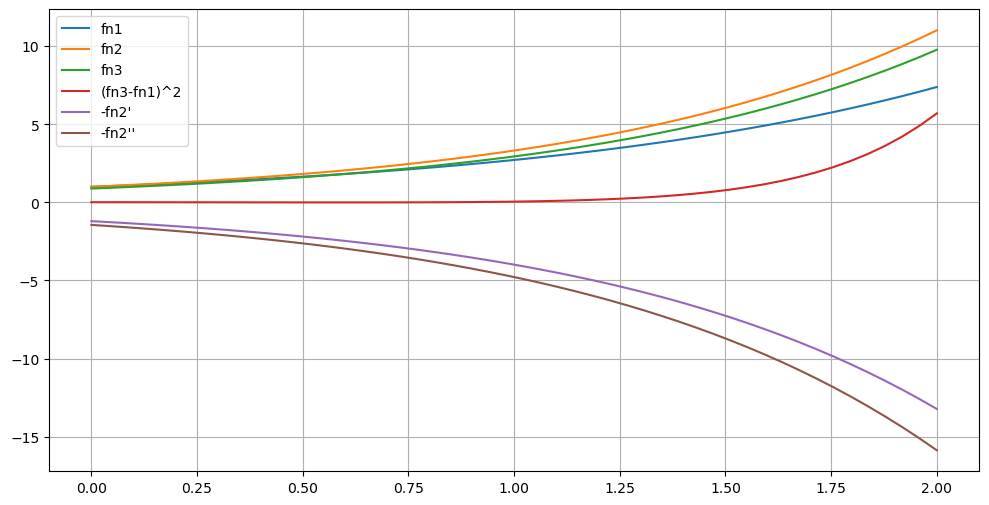

In [63]:
fn1 = f.Exp()
print(fn1.params())
fn2 = fn1.update(k=1.2)
fn3 = fn2.update(x0=0.1)
diff2 = lambda x: (fn3(x)-fn1(x))**2
fn1.plot(0, 2, label="fn1")
fn2.plot(0, 2, label="fn2")
fn3.plot(0, 2, label="fn3")
fn2.plot(0, 2, func=diff2, label="(fn3-fn1)^2")
fn2.plot(0, 2, func=fn2.p, label="-fn2'")
fn2.plot(0, 2, func=fn2.pp, label="-fn2''")
plt.legend()
x0 = f.goalseek(func=diff2, x0=1.5)
print(f"fn1 = fn3 @ ({x0:.2f}, {fn1(x0):.2f})")
plt.show()

### LogFunction

{'base': 10, 'N': 1, 'x0': 0}
fn1 = fn3 @ (1.17, 0.07)


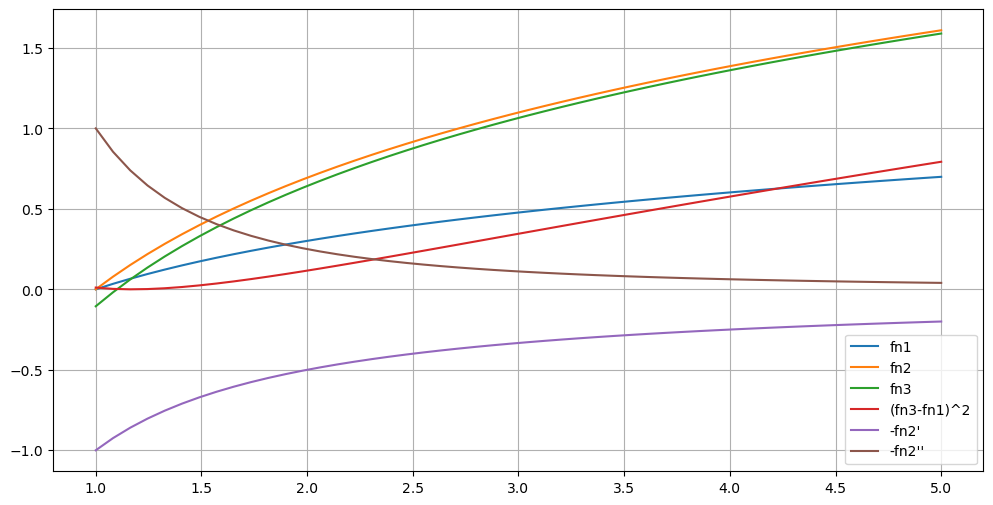

In [64]:
fn1 = f.Log()
print(fn1.params())
fn2 = fn1.update(base=fn1.E)
fn3 = fn2.update(x0=0.1)
diff2 = lambda x: (fn3(x)-fn1(x))**2
fn1.plot(1, 5, label="fn1")
fn2.plot(1, 5, label="fn2")
fn3.plot(1, 5, label="fn3")
fn2.plot(1, 5, func=diff2, label="(fn3-fn1)^2")
fn2.plot(1, 5, func=fn2.p, label="-fn2'")
fn2.plot(1, 5, func=fn2.pp, label="-fn2''")
plt.legend()
x0 = f.goalseek(func=diff2, x0=1.5)
print(f"fn1 = fn3 @ ({x0:.2f}, {fn1(x0):.2f})")
plt.show()

### HyperbolaFunction

{'k': 1, 'x0': 0, 'y0': 0}
fn1 = fn3 @ (2.48, 0.40)


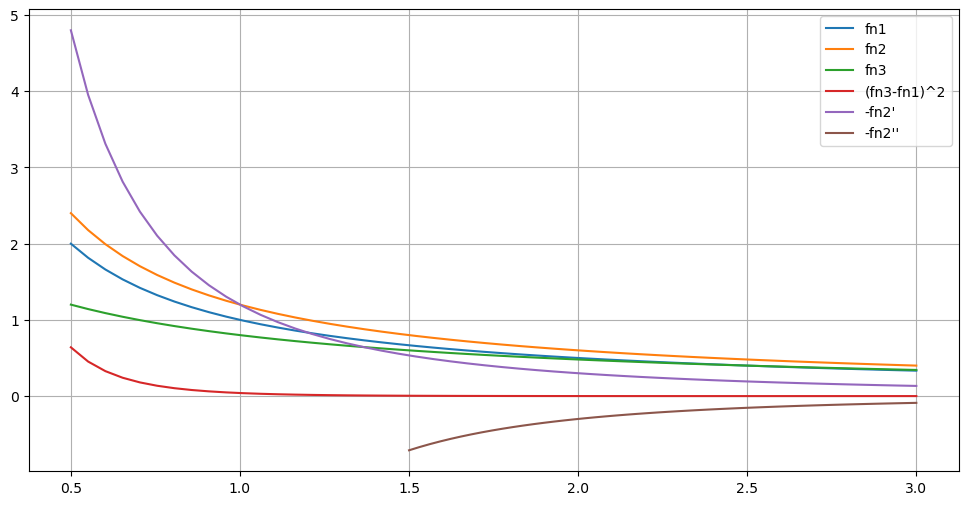

In [65]:
fn1 = f.Hyperbola()
print(fn1.params())
fn2 = fn1.update(k=1.2)
fn3 = fn2.update(x0=-0.5)
diff2 = lambda x: (fn3(x)-fn1(x))**2
fn1.plot(0.5, 3, label="fn1")
fn2.plot(0.5, 3, label="fn2")
fn3.plot(0.5, 3, label="fn3")
fn2.plot(0.5, 3, func=diff2, label="(fn3-fn1)^2")
fn2.plot(0.5, 3, func=fn2.p, label="-fn2'")
fn2.plot(1.5, 3, func=fn2.pp, label="-fn2''")
plt.legend()
x0 = f.goalseek(func=diff2, x0=1.5)
print(f"fn1 = fn3 @ ({x0:.2f}, {fn1(x0):.2f})")
plt.show()

## Function examples

_shortened version of the [NOTEST] section above, removing the charts_

In [66]:
fn1 = f.Quadratic(a=1, b=2, c=3)
assert f.Quadratic is f.QuadraticFunction
assert fn1.params() == {'a': 1, 'b': 2, 'c': 3}
fn2 = fn1.update(b=0)
assert fn2.params() == {'a': 1, 'b': 0, 'c': 3}
assert iseq(fn1(1), 6, fn1.f(1))
assert iseq(-fn1.p(1), 4, fn1.df_dx(1))
assert iseq(-fn1.pp(1), 2)
fn1(1), -fn1.p(1), -fn1.pp(1)

(6, 3.9999999999995595, 1.999999987845058)

In [67]:
fn1 = f.Powerlaw()
assert f.Powerlaw is f.PowerlawFunction
assert fn1.params() == {'N': 1, 'alpha': -1, 'x0': 0}
fn2 = fn1.update(alpha=-2)
assert fn2.params() == {'N': 1, 'alpha': -2, 'x0': 0}
assert iseq(fn1(1), 1, fn1.f(1))
assert iseq(-fn1.p(1), -1, fn1.df_dx(1))
assert iseq(-fn1.pp(1), 2)
fn1(1), -fn1.p(1), -fn1.pp(1)

(1.0, -1.0000000099996686, 1.999999987845058)

In [68]:
fn1 = f.Trig()
assert f.Trig is f.TrigFunction
assert fn1.params() == {'amp': 1, 'omega': 1, 'phase': 0}
fn2 = fn1.update(amp=-2)
assert fn2.params() == {'amp': -2, 'omega': 1, 'phase': 0}
assert iseq(0, fn1(1), fn1.f(1))
assert iseq(-fn1.PI, -fn1.p(1), fn1.df_dx(1))
assert iseq(0, -fn1.pp(1))
fn1(1), -fn1.p(1), -fn1.pp(1)

(1.2246467991473532e-16, -3.141592601913358, -8.089064995189793e-13)

In [87]:
fn1 = f.Exp(k=2)
assert f.Exp is f.ExpFunction
assert fn1.params() == {'N': 1, 'k': 2, 'x0': 0}
fn2 = fn1.update(k=-2)
assert fn2.params() == {'N': 1, 'k': -2, 'x0': 0}
assert iseq(fn1.E**2, fn1(1), fn1.f(1))
assert iseq(2*fn1.E**2, -fn1.p(1), fn1.df_dx(1))
assert iseq(4*fn1.E**2, -fn1.pp(1))
fn1(1), -fn1.p(1), -fn1.pp(1)

(7.38905609893065, 14.778112296380819, 29.55622449007933)

In [94]:
fn1 = f.Log()
assert f.Log is f.LogFunction
assert fn1.params() == {'base': 10, 'N': 1, 'x0': 0}
fn2 = fn1.update(base=fn1.E)
assert fn2.params() == {'base': fn1.E, 'N': 1, 'x0': 0}
assert iseq(0, fn1(1), fn1.f(1))
assert iseq(0.4342944833508522, -fn1.p(1), fn1.df_dx(1))
assert iseq(-0.4342944840747152, -fn1.pp(1))
fn1(1), -fn1.p(1), -fn1.pp(1)

(0.0, 0.4342944833508522, -0.4342944840747152)

In [102]:
fn1 = f.Hyperbola()
assert f.Hyperbola is f.HyperbolaFunction
assert fn1.params() == {'k': 1, 'x0': 0, 'y0': 0}
fn2 = fn1.update(x0=1)
assert fn2.params() == {'k': 1, 'x0': 1, 'y0': 0}
assert iseq(1, fn1(1), fn1.f(1))
assert iseq(-1, -fn1.p(1), fn1.df_dx(1))
assert iseq(2, -fn1.pp(1))
fn1(1), -fn1.p(1), -fn1.pp(1)

(1.0, -1.0000000099996686, 1.999999987845058)